# ***Standard (Fully Connected) Nural Network***
>This is what I’m planning to do in my code
   1. Loading dataset
   2. preprocessing the dataset
   3. Defination of Neural Network
   4. Training a Neural Network
   5. Testing a Neural network

# **Loding Required packages And Data**

In [3]:
#load data and sploat data
import tensorflow as tf
from tensorflow.keras import layers , models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow .keras.layers import Dense
from tensorflow.keras.utils import to_categorical
#load the fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_lables) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# **Data Splitting**

In [4]:
# spilitting the data into the test and train set
(X_train , Y_train) , (X_test , Y_test) = fashion_mnist.load_data()

# **Data display**

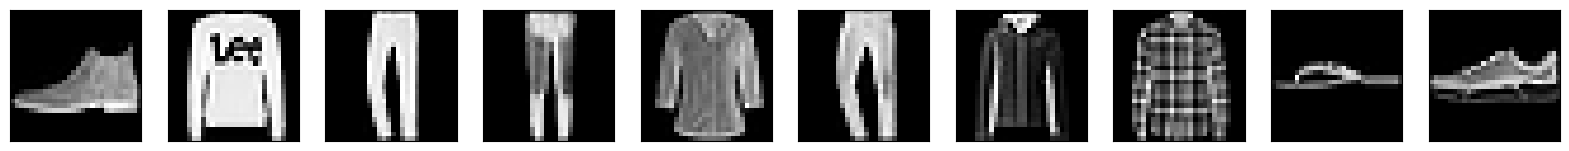

In [5]:
import matplotlib.pyplot as plt
# NUmber of images to display
n = 10
# create a figure to display the images
plt.figure(figsize= ( 20,4))
# Loop through the first " n " images
for i in range(n) :

  # Create a subplot within the figure
  ax = plt.subplot(2, n , i+1)

  # display the orignal image
  plt.imshow(X_test[i].reshape(28,28))

  # set colormap to grayscale
  plt.gray()
  # Hide x_axis and y_axis lables and tricks
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
#Show the figure with the images
plt.show()
# Close the figure
plt.close()

# Flattening the images

In [6]:
# Print the shapes of the original training data and labels
print("Previous X_train shape : {} \nPrevious Y_train shape:{}" . format(X_train.shape , Y_train.shape))

# reshape training and testing data to a flat format (flatting the images )
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)



Previous X_train shape : (60000, 28, 28) 
Previous Y_train shape:(60000,)


# **Min-Max Scalling**

In [7]:
# Convert the data type of the images to float32
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

#Normalize the pixel values to a range between 0 and 1
# Zero is for black and 1 is for white
X_train /= 255
X_test  /= 255

# **Processing the Target Variable**

In [8]:
# Numbere of classes in the dataset
classes = 10
# Convert the lables to one-hot encoded format
Y_train = to_categorical(Y_train , classes)
Y_test = to_categorical(Y_test, classes)

# Print the shape of the preprocessed training data and lables
print("New X_train shape : {} \nNew Y_train shape:{}".format(X_train.shape , Y_train.shape))


New X_train shape : (60000, 784) 
New Y_train shape:(60000, 10)


# **Setting up Hyper-parameters**

In [21]:
# Define the input size for eacah data sample (e.g , images pixels)
input_size = 784

# Specify the number of the data sample to process in eacah batch
batch_size =  200

# Define the number of neurons in the first hidden layer
hidden1 = 400

# Define the number of neurons in the Second hidden layer
hidden2 = 20

# Define the total number of classes/categories in the dataset
classes =  10

# Set the number of complete passes through the dataset during training
epochs = 50



# **Building the FCN Model**

In [22]:
# build the model
#create a Sequential model , which allows us to build a neural network layer by layer
model = Sequential()

# Add the first hidden layer with 'hidden1' neurons, using ReLU activation function
# The 'input_dim' specifies the input size for this layer
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))

#output = relu(dot(W, input) + bias)

# Add the second hidden layer with "hidden2" neurons , also using ReLU activation function

model.add(Dense(hidden2, activation = "relu"))

# Add the output layer with 'classes' neurons, using softmax activation function
# Softmax activation ensures that the output values represent probabilities of each class
model.add(Dense(classes, activation='softmax'))

### Compilation ###

# Compile the model by specifying the loss function , optimization and evaluation matrices
model.compile(loss = "categorical_crossentropy",
              metrics = ["accuracy"], optimizer = "sgd")
# Display a summary of the model architecture , showing the layers and parametrs counts
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 400)                 │         314,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 20)                  │           8,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,230 (1.23 MB)

 Trainable params: 322,230 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

# **Training The Model**

In [23]:
# Import necessary libraries
from time import time

# Record the current time to measure training time

tic = time()

# fit the model on the training data
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

# record the time after model traininig
toc = time()

# Calculating and print the time taken for model training
print("Model training took {} secs".format(toc - tic))



Epoch 1/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4447 - loss: 1.7234
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7606 - loss: 0.7820
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7929 - loss: 0.6301
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8080 - loss: 0.5706
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8166 - loss: 0.5404
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8240 - loss: 0.5179
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8305 - loss: 0.4945
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8334 - loss: 0.4841
Epoch 9/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8386 - loss: 0.4686
Epoch 10/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8416 - loss: 0.4598
Epoch 11/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8469 - loss: 0.4458
Epoch 12/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/s

# **Testing The Model**

In [25]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test set using the train model
y_pred_probs = model.predict(X_test , verbose=0)
y_pred = np.where(y_pred_probs > 0.5 , 1 , 0)

# Calculate and print the test accuracy using predicted and true lables

test_accuracy = accuracy_score(y_pred , Y_test)
print("\nTest accuracy : {}".format(test_accuracy))


Test accuracy : 0.84


In [26]:
# Define a mask for selecting a range of indices (20 to 49)
mask = range(20, 50)

# Select the first 20 samples from the test set for visualization
X_valid = X_test[0:20]
actual_labels = Y_test[0:20]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


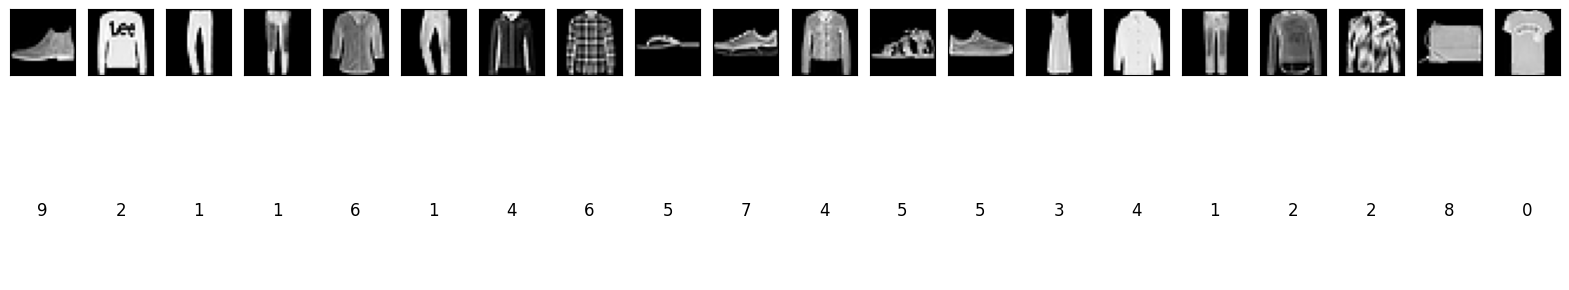

In [27]:
# Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()
